Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
file.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Exploratory Data Analysis

In [ ]:
file.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Drop rows with null BMI value 
file.dropna(how="any", inplace=True)
file = file.fillna("", inplace=False)
file.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [ ]:
file.drop('id', axis=1, inplace=True)

In [ ]:
file.reset_index(drop=True, inplace=True)

In [ ]:
file.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Exploratory Data Analysis

In [ ]:
file.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
file['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

Only about 4% has stroke

<function matplotlib.pyplot.show>

<Figure size 432x432 with 0 Axes>

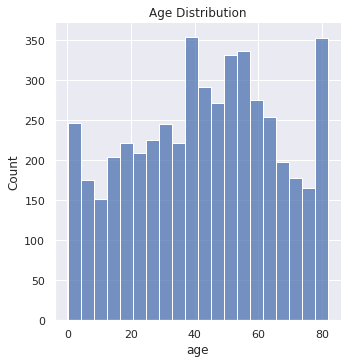

In [ ]:
# Age Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(file['age'])
plt.title('Age Distribution')
plt.show

all age groups covered

Text(0, 0.5, 'stroke rate')

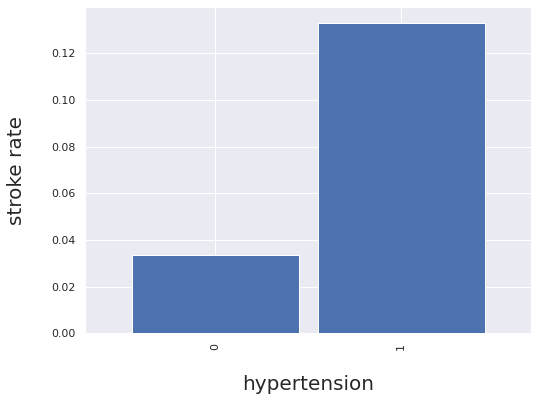

In [ ]:
# Relationship between hypertension and stroke
xh = file.groupby('hypertension')['stroke'].mean()
ax = xh.plot(kind='bar', figsize=(8,6), zorder=3, width=0.9)
ax.set_xlabel('hypertension', labelpad= 25, fontsize=20)
ax.set_ylabel('stroke rate', labelpad= 25, fontsize=20)

The plot shows there is higher probability of having stroke in people with hypertension

Text(0, 0.5, 'stroke rate')

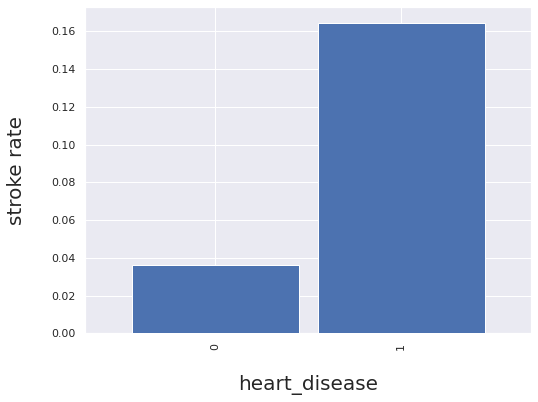

In [ ]:
# Relationship between heart disease and stroke
xh = file.groupby('heart_disease')['stroke'].mean()
ax = xh.plot(kind='bar', figsize=(8,6), zorder=3, width=0.9)
ax.set_xlabel('heart_disease', labelpad= 25, fontsize=20)
ax.set_ylabel('stroke rate', labelpad= 25, fontsize=20)

the plot shows people with  heart diseases have higher chances of developing stroke

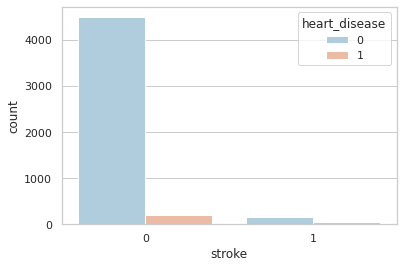

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="stroke", hue="heart_disease", data=file, palette="RdBu_r")

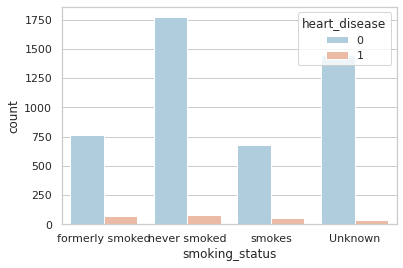

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="smoking_status", hue="heart_disease", data=file, palette="RdBu_r")

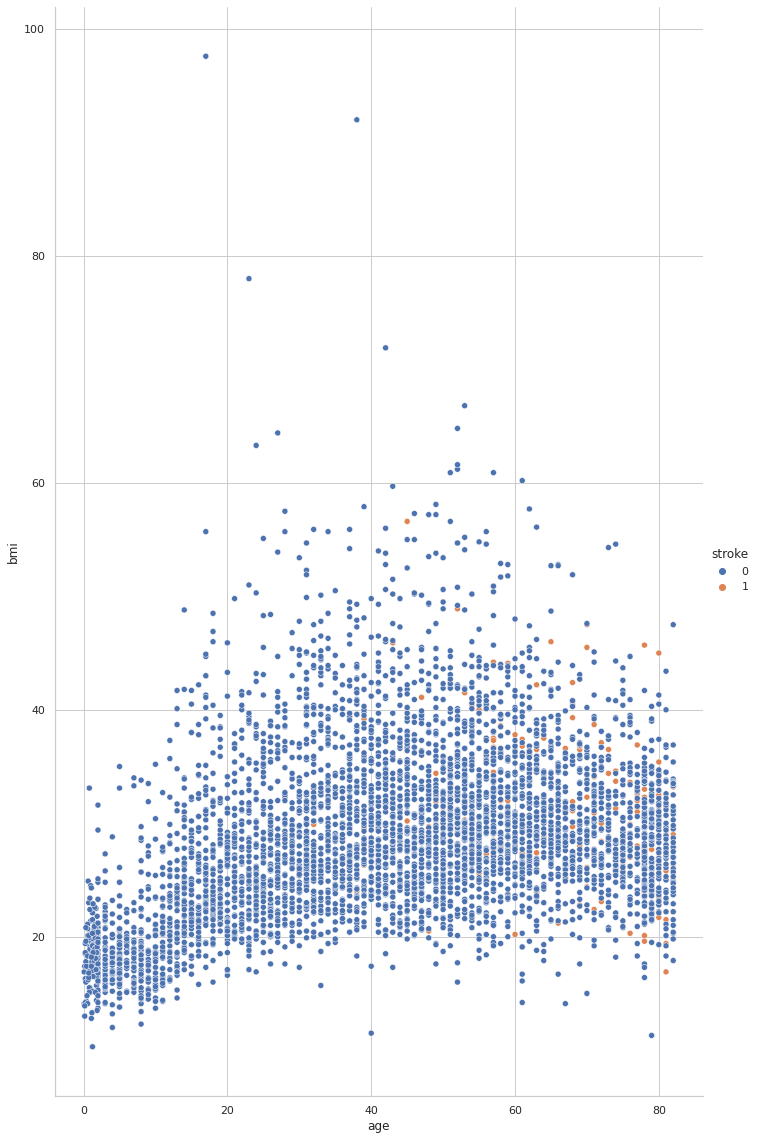

In [ ]:
sns.relplot(x="age", y="bmi", hue="stroke", data=file, height=16, aspect=10/16)


Stroke is more frequent in people over 60 with bmi over 30

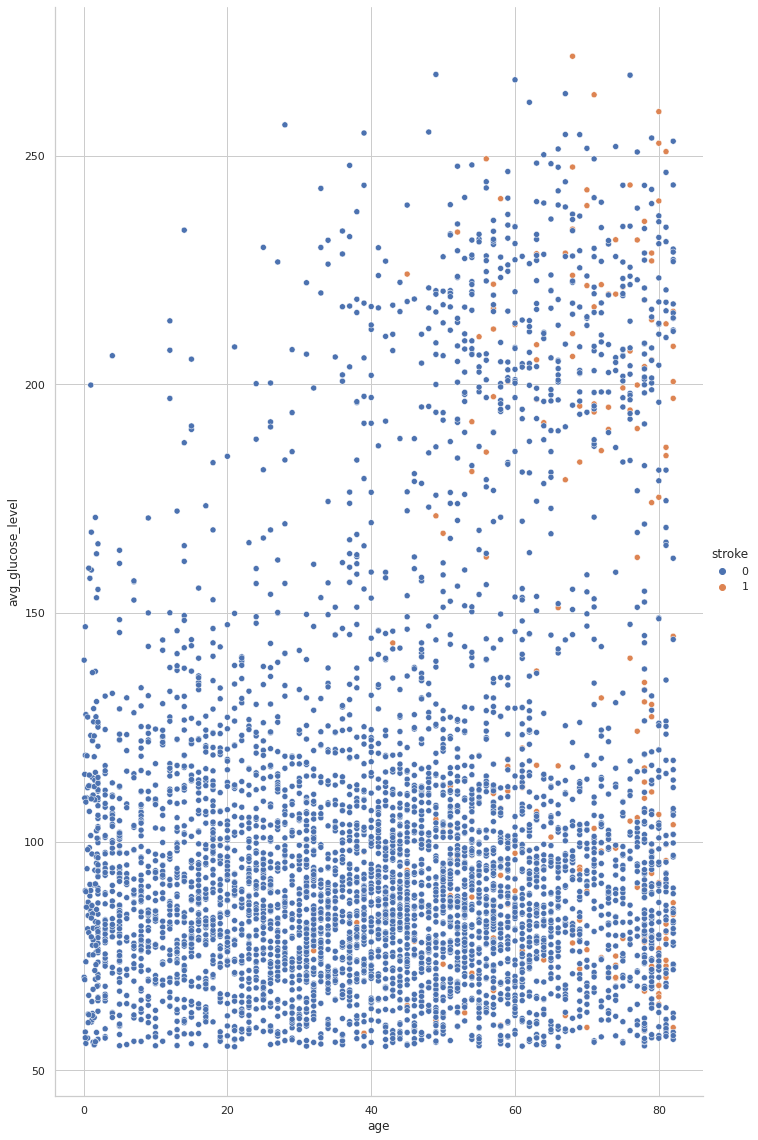

In [ ]:
sns.relplot(x="age", y="avg_glucose_level", hue="stroke", data=file, height=16, aspect=10/16)

Stroke more common in people above 60yrs and glucose level above 160

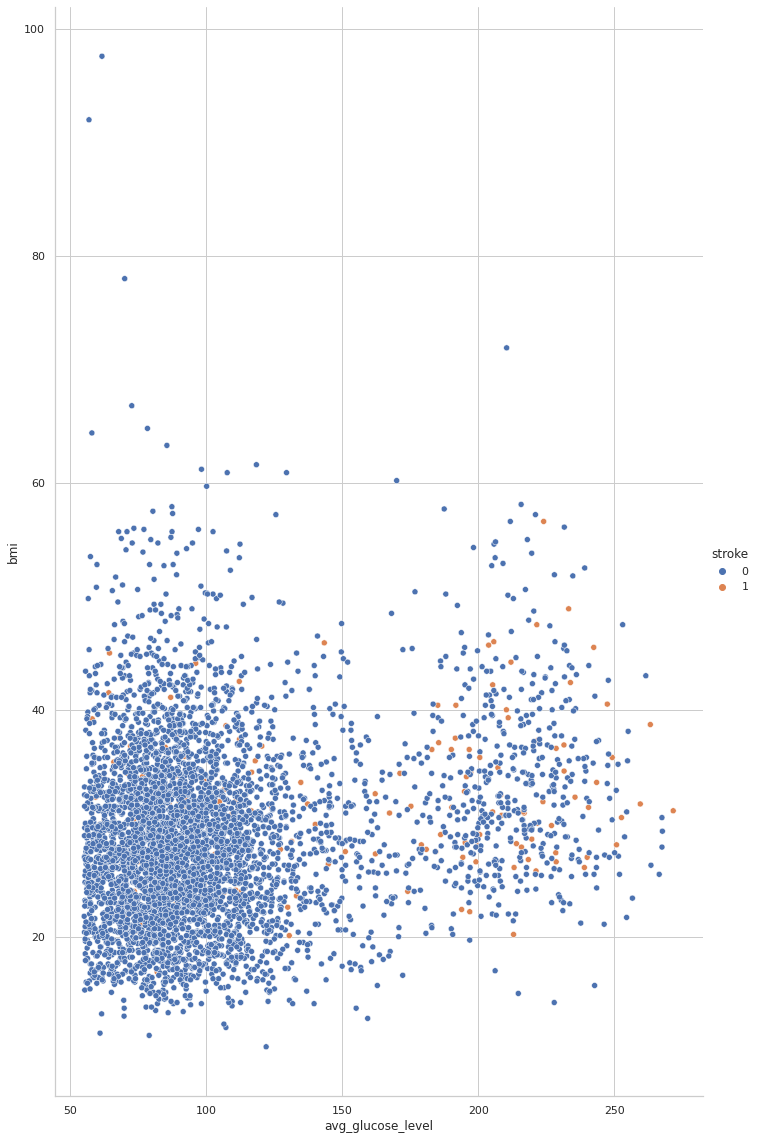

In [ ]:
sns.relplot(x="avg_glucose_level", y="bmi", hue="stroke", data=file, height=16, aspect=10/16)

Stroke is more frequent in people with average glucose above 160 and bmi above 25

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
file['ever_married']= enc.fit_transform(file['ever_married'])
file['Residence_type']= enc.fit_transform(file['Residence_type'])
file['smoking_status']= enc.fit_transform(file['smoking_status'])
file['work_type'] = enc.fit_transform(file['work_type'])
file['gender']=  enc.fit_transform(file['gender'])
file.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1


#Splitting the data for train and test and Normalizing

In [ ]:
Y = file.pop('stroke')


In [ ]:
X = file
X.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2
2,0,49.0,0,0,1,2,1,171.23,34.4,3
3,0,79.0,1,0,1,3,0,174.12,24.0,2
4,1,81.0,0,0,1,2,1,186.21,29.0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

std = StandardScaler()
X_norm = std.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=0)

###Saving the scalar

In [ ]:
import pickle
import os

In [ ]:
scaler_path=os.path.join('/content/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

# Training 

Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
dt.feature_importances_ # shows how important the columns are to the model

array([0.        , 0.81461404, 0.        , 0.03099157, 0.        ,
       0.01138727, 0.        , 0.13430945, 0.        , 0.00869768])

In [ ]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In our model age plays the major role, then followed by bmi and average glucose level

In [ ]:
Yhat = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
dt_sc = accuracy_score(Yhat, Y_test)
dt_sc

0.9541751527494908

SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [ ]:
Yhat2 = svc.predict(X_test)


In [ ]:
svc_sc = accuracy_score(Yhat2, Y_test)
svc_sc

0.9562118126272913

In [ ]:
import joblib
model_path=os.path.join('/content/','models/svm.sav')
joblib.dump(svc,model_path)

['/content/models/svm.sav']

KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Yhat = knn.predict(X_test)

In [ ]:
knn_sc = accuracy_score(Yhat, Y_test)
knn_sc

0.955193482688391

Plotting the accuracy of the models

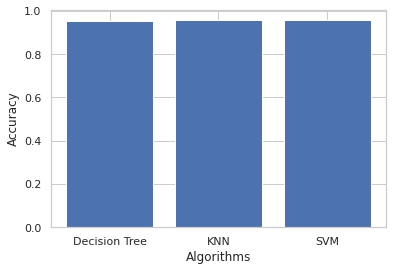

In [ ]:
plt.bar(['Decision Tree','KNN','SVM'],[dt_sc,knn_sc,svc_sc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

Our three models have similar accuracies with that of SVM's being the highest